<h1> summary of experiment</h1>
<h3> total data sample 544</h3>
<h3> number of classes 2 (damaged, correct)</h3>
<h3> CNN model gives 98% accuracy</h3> 

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import torch
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import time
import random

In [ ]:
Data=loadmat("/content/gdrive/MyDrive/Old_ADA_Bridge-damage_vibration_data.mat")

<h1> ambient data analysis </h1>

data: ambient: case index{1:int,2:dmg1,3:dmg2,4:rcv,5:dmg3}<br>
data[ambient][1]: {1:no1,2:no2,3:no3}<br>
data[ambient][1]: 48614*8  matrix { a1,a2,a3,a4}

In [ ]:
import pandas as pd

In [ ]:
class ambDataMatrix:
    def __init__(self,data):
        self.data=dict()
        self.classes=['a1','a2','a3','a4','a5','a6','a7','a8']
        try:
            for i in range(0,8):
                self.data[self.classes[i]]=data[:8868,i]
        except:
            return
        

In [ ]:
class ambMatData:
    def __init__(self,data):
        self.header='AMBIENT'
        self.data=dict()
        for i in range(1,6):
            new_data=dict()
            for j in range(1,4,1):
                if data['AMBIENT'][i][j].shape==(1,0):
                    continue
                else:
                    new_data['no'+str(j)]=ambDataMatrix(data['AMBIENT'][i][j])
#                     print(new_data['no'+str(j)].data['time'].shape)
            self.data[data['AMBIENT'][i][0][0]]=new_data

In [ ]:
ambDataObj=ambMatData(Data)

In [ ]:
ambDataObj.data['INT'].keys()

dict_keys(['no1', 'no2', 'no3'])

In [ ]:
def normal(array):
  new_arr=[]
  for arr in array:
    arr_=(arr-np.min(arr))/(np.max(arr)-np.min(arr))
    new_arr.append(arr_)
  return new_arr

In [ ]:
x_amb=[]
y_amb=[]
for i in ['INT','RCV']:
  for j in ambDataObj.data[i].keys():
    for k in ambDataObj.data[i][j].data.keys():
      # x_amb.append(normal(ambDataObj.data[i][j].data[k]))
      x_amb.append(ambDataObj.data[i][j].data[k])
      y_amb.append(1)

for i in ['DMG1','DMG2','DMG3']:
  for j in ambDataObj.data[i].keys():
    for k in ambDataObj.data[i][j].data.keys():
      # x_amb.append(normal(ambDataObj.data[i][j].data[k]))
      x_amb.append(ambDataObj.data[i][j].data[k])
      y_amb.append(1)

X_amb=np.array(x_amb)
Y_amb=np.array(y_amb)

<h1> --------------------------------------------------------------------------------</h1>

In [ ]:
class dataMatrix:
    def __init__(self,data):
        self.data=dict()
        self.classes=['time','a1','a2','a3','a4','a5','a6','a7','a8','o1','o2','o3']
        try:
            for i in range(12):
                self.data[self.classes[i]]=data[:8868,i]
        except:
            return
        

In [ ]:
class matData:
    def __init__(self,data):
        self.header='VBA'
        self.data=dict()
        for i in range(1,8):
            new_data=dict()
            for j in range(1,13,1):
                if data['VBA'][i][j].shape==(1,0):
                    continue
                else:
                    new_data['no'+str(j)]=dataMatrix(data['VBA'][i][j])
#                     print(new_data['no'+str(j)].data['time'].shape)
            self.data[data['VBA'][i][0][0]]=new_data
        

In [ ]:
dataObj=matData(Data)
classes=['time','a1','a2','a3','a4','a5','a6','a7','a8','o1','o2','o3']
case=['INT 30km','INT 50km','INT 40km','RCV 40km','DMG1 40km','DMG2 40km','DMG3 40km']

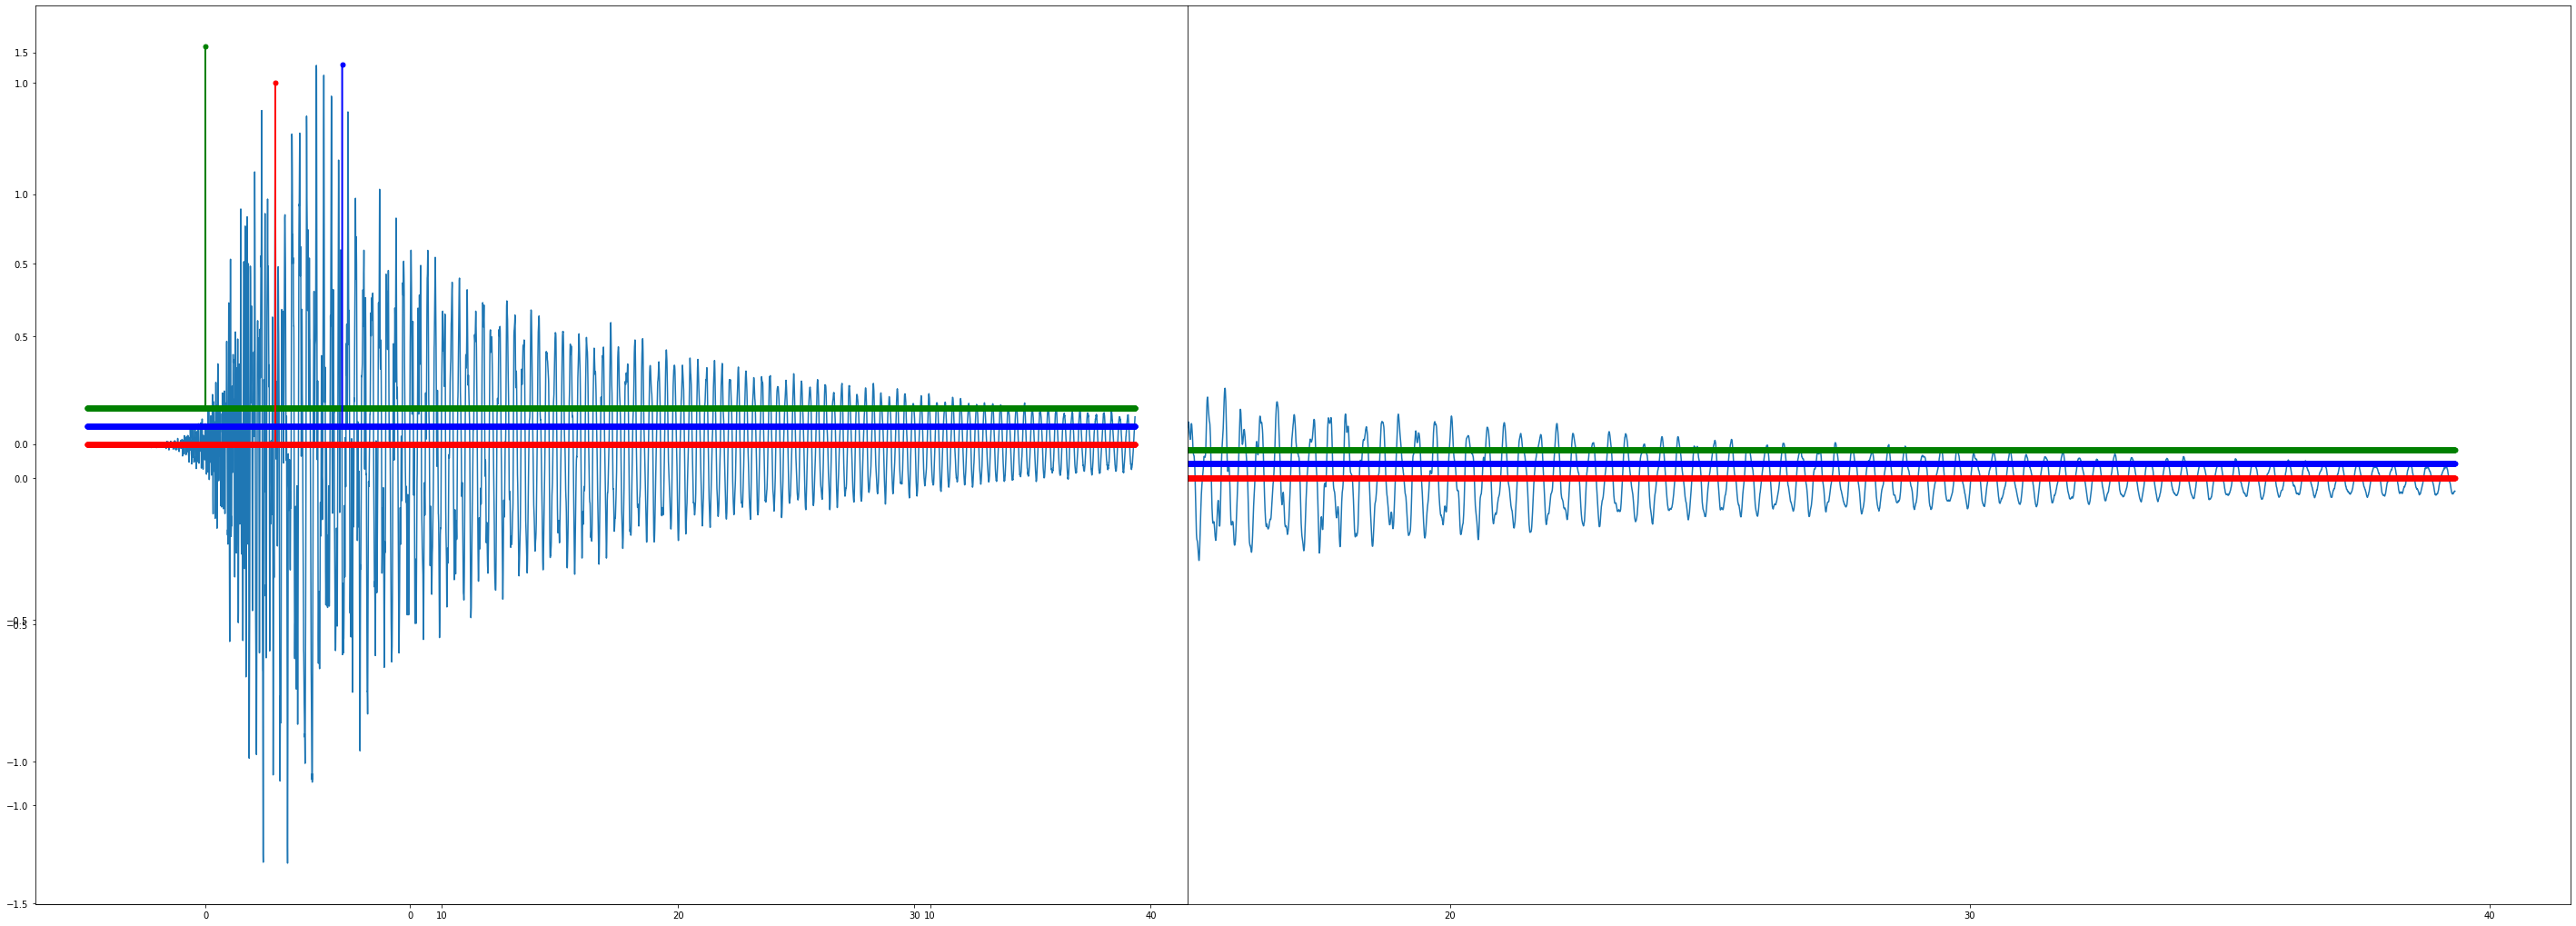

In [ ]:

f=plt.figure(figsize=(50,40))
one=f.add_subplot(211)
two=f.add_subplot(221)
one.plot(dataObj.data[case[2]]['no1'].data['time'],dataObj.data[case[2]]['no1'].data['a1'])
one.plot(dataObj.data[case[2]]['no1'].data['time'],dataObj.data[case[2]]['no1'].data['o1']+.1,'g-o',ms=5)
one.plot(dataObj.data[case[2]]['no1'].data['time'],dataObj.data[case[2]]['no1'].data['o2'],'r-o',ms=5)
one.plot(dataObj.data[case[2]]['no1'].data['time'],dataObj.data[case[2]]['no1'].data['o3']+.05,'b-o',ms=5)

two.plot(dataObj.data[case[3]]['no1'].data['time'],dataObj.data[case[3]]['no1'].data['a1'])
two.plot(dataObj.data[case[3]]['no1'].data['time'],dataObj.data[case[3]]['no1'].data['o1']+.1,'g-o',ms=5)
two.plot(dataObj.data[case[3]]['no1'].data['time'],dataObj.data[case[3]]['no1'].data['o2'],'r-o',ms=5)
two.plot(dataObj.data[case[3]]['no1'].data['time'],dataObj.data[case[3]]['no1'].data['o3']+.05,'b-o',ms=5)

plt.show()

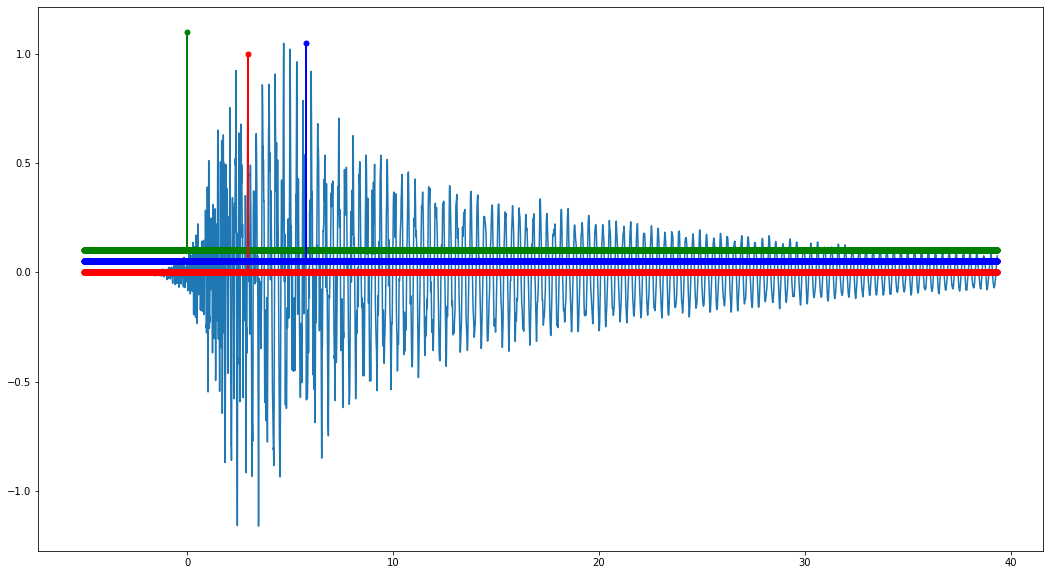

In [ ]:
plt.figure(figsize=(18,10))

plt.plot(dataObj.data[case[3]]['no1'].data['time'],dataObj.data[case[3]]['no1'].data['a1'])
plt.plot(dataObj.data[case[3]]['no1'].data['time'],dataObj.data[case[3]]['no1'].data['o1']+.1,'g-o',ms=5)
plt.plot(dataObj.data[case[3]]['no1'].data['time'],dataObj.data[case[3]]['no1'].data['o2'],'r-o',ms=5)
plt.plot(dataObj.data[case[3]]['no1'].data['time'],dataObj.data[case[3]]['no1'].data['o3']+.05,'b-o',ms=5)
plt.show()

In [ ]:
x_train=[]
y_train=[]
for i in case[:4]:
    keys=dataObj.data[i].keys()
    for j in keys:
        for k in classes[1:-3]:
            # x_train.append(normal(dataObj.data[i][j].data[k]))
            x_train.append(dataObj.data[i][j].data[k])
            y_train.append(1)
            
for i in case[4:]:
    keys=dataObj.data[i].keys()
    for j in keys:
        for k in classes[1:-3]:
            # x_train.append(normal(dataObj.data[i][j].data[k]))
            x_train.append(dataObj.data[i][j].data[k])
            y_train.append(0)

X=np.array(x_train)
Y=np.array(y_train)
print(X.shape)
print(Y.shape)

(544, 8868)
(544,)


<h1> all sensor data</h1>

(68, 8, 8868)
(68,)


In [ ]:
def shuffle(a,b):
  c=[]
  for i in range(len(a)):
    c.append([a[i],b[i]])
  # print(c)
  random.shuffle(c)
  # print(c)
  a=np.array([i[0] for i in c])
  b=np.array([i[1] for i in c])
  return a,b

In [ ]:
x_data,y_data=shuffle(X,Y)
# x_amb,y_amb=shuffle(x_amb,y_amb)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

epoch:  0 .................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


train_size:  50  accuracy VBA:  0.6052631578947368 ambient accuracy:  0.671875  execution time:  0 ms


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


train_size:  150  accuracy VBA:  0.6395939086294417 ambient accuracy:  0.765625  execution time:  0 ms


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


train_size:  250  accuracy VBA:  0.6292517006802721 ambient accuracy:  0.75  execution time:  0 ms


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


train_size:  350  accuracy VBA:  0.6494845360824743 ambient accuracy:  0.734375  execution time:  0 ms


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


train_size:  450  accuracy VBA:  0.6382978723404256 ambient accuracy:  0.6875  execution time:  0 ms


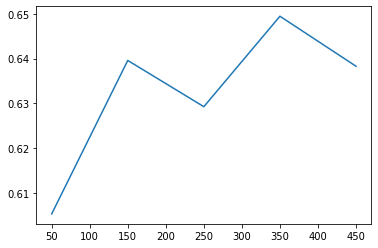

In [ ]:
# solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
# penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
for i in range(1):
  print("epoch: ",i,'.................')
  accuracy=[]
  train_accuracy=[]
  x_data,y_data=shuffle(X,Y)
  x_amb,y_amb=shuffle(x_amb,y_amb)
  for train_size in range(50,500,100):
    model=LogisticRegression(max_iter=1000,penalty='none',solver='saga').fit(x_data[:train_size],y_data[:train_size])
    acc=accuracy_score(model.predict(x_data[train_size:]),y_data[train_size:])
    train_acc=accuracy_score(model.predict(x_data[:train_size]),y_data[:train_size])
    start_time=time.time()
    _=accuracy_score(model.predict([x_data[-1]]),[y_data[-1]])
    end_time=time.time()-start_time
    print("train_size: ",train_size," accuracy VBA: ",acc,"ambient accuracy: ",accuracy_score(model.predict(x_amb),y_amb), " execution time: ", int(end_time*1000), "ms")
    accuracy.append(acc)
    train_accuracy.append(train_acc)

  plt.plot(range(50,500,100),accuracy)
  # plt.plot(range(50,500,100),train_accuracy)
  # plt.legend()

In [ ]:
# same accuracy and goor ambient acuracy without normalization.

<h1> multiple linear regression</h1>

In [ ]:
from sklearn.linear_model import LinearRegression

train_size:  50  max_accuracy:  0.6032388663967612 execution time:  0 ms
train_size:  90  max_accuracy:  0.6057268722466961 execution time:  0 ms
train_size:  130  max_accuracy:  0.6618357487922706 execution time:  0 ms
train_size:  170  max_accuracy:  0.6390374331550802 execution time:  0 ms
train_size:  210  max_accuracy:  0.6467065868263473 execution time:  0 ms
train_size:  250  max_accuracy:  0.6428571428571429 execution time:  0 ms
train_size:  290  max_accuracy:  0.65748031496063 execution time:  0 ms
train_size:  330  max_accuracy:  0.6682242990654206 execution time:  0 ms
train_size:  370  max_accuracy:  0.6896551724137931 execution time:  0 ms
train_size:  410  max_accuracy:  0.6940298507462687 execution time:  0 ms
train_size:  450  max_accuracy:  0.7127659574468085 execution time:  2 ms
train_size:  490  max_accuracy:  0.7407407407407407 execution time:  0 ms


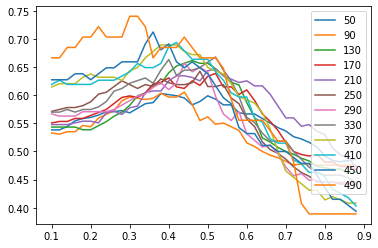

In [ ]:

x_data,y_data=shuffle(X,Y)
x_amb,y_amb=shuffle(x_amb,y_amb)
for counter in range(50,500,50):
  x_train=x_data[:counter]
  x_test=x_data[counter:]
  y_train=y_data[:counter]
  y_test=y_data[counter:]
  linear_model=LinearRegression().fit(x_train,y_train)
  pred=linear_model.predict(x_test)
  pred_norm=(pred-np.min(pred))/(np.max(pred)-np.min(pred))
  threshold=[]
  acc=[]
  acc_=0
  acc__=0
  thresh=.1
  while thresh<.9:
    acc_=np.sum((y_test==(pred_norm>thresh).astype(np.int_)).astype(np.int_))/len(y_test)
    acc.append(acc_)
    acc__=max(acc_,acc__)
    threshold.append(thresh)
    thresh+=0.02
  start_time=time.time()
  _=linear_model.predict([x_data[-1]])
  end_time=time.time()-start_time

  print("train_size: ",counter," max_accuracy: ",acc__, "execution time: ", int(end_time*1000), "ms")
  plt.plot(threshold,acc)
plt.legend(range(50,500,50))

    

<h1> Support vector machine</h1>

In [ ]:
from  sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


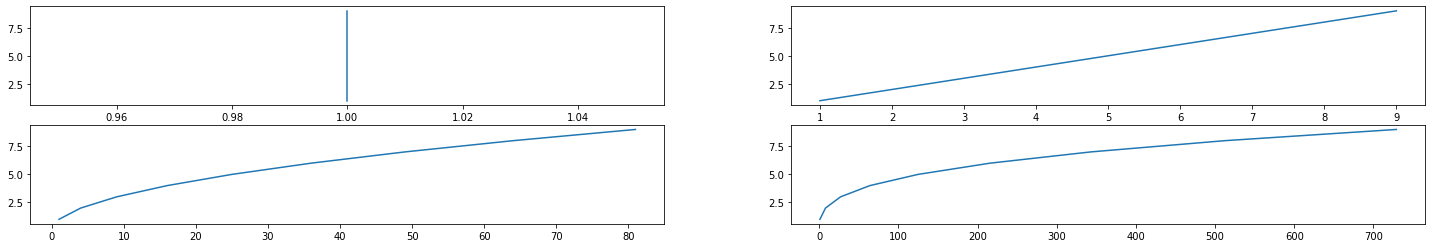

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(25,4))
axs=np.ravel(ax)


linear ..........
train_size:  50  accuracy VBA:  0.6700404858299596 ambient accuracy:  0.859375  execution time:  1 ms
train_size:  60  accuracy VBA:  0.6632231404958677 ambient accuracy:  0.9375  execution time:  1 ms
train_size:  70  accuracy VBA:  0.6497890295358649 ambient accuracy:  0.84375  execution time:  1 ms
train_size:  80  accuracy VBA:  0.6702586206896551 ambient accuracy:  0.8125  execution time:  1 ms
train_size:  90  accuracy VBA:  0.6497797356828194 ambient accuracy:  0.75  execution time:  1 ms
train_size:  100  accuracy VBA:  0.6509009009009009 ambient accuracy:  0.75  execution time:  1 ms
train_size:  110  accuracy VBA:  0.6612903225806451 ambient accuracy:  0.734375  execution time:  1 ms
train_size:  120  accuracy VBA:  0.6792452830188679 ambient accuracy:  0.84375  execution time:  1 ms
train_size:  130  accuracy VBA:  0.6594202898550725 ambient accuracy:  0.890625  execution time:  1 ms
train_size:  140  accuracy VBA:  0.6485148514851485 ambient accuracy:  0.8

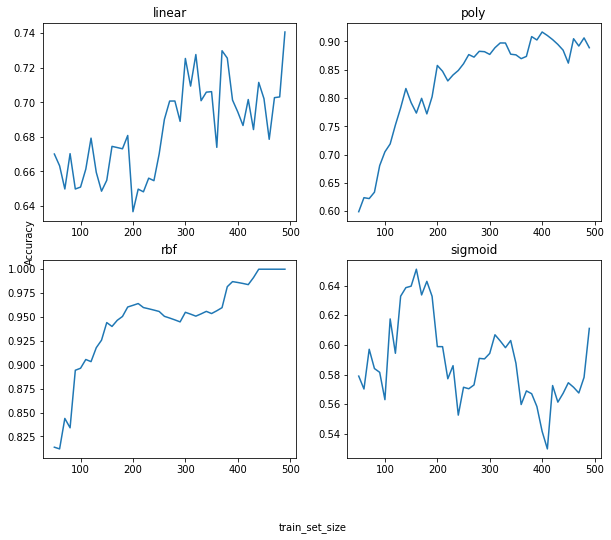

In [ ]:
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
kernels=['linear','poly','rbf','sigmoid']
x_data,y_data=shuffle(X,Y)
x_amb,y_amb=shuffle(x_amb,y_amb)
fig,ax=plt.subplots(2,2,figsize=(10,8))
ax=np.ravel(ax)
for plot_number in range(4):
  kernel=kernels[plot_number]
  accuracy=[]
  print(kernel,'..........')
  for train_size in range(50,500,10):
    model=make_pipeline(StandardScaler(),SVC(kernel=kernel))
    model.fit(x_data[:train_size],y_data[:train_size])
    acc=accuracy_score(model.predict(x_data[train_size:]),y_data[train_size:])
    start_time=time.time()
    _=accuracy_score(model.predict([x_data[-1]]),[y_data[-1]])
    end_time=time.time()-start_time
    print("train_size: ",train_size," accuracy VBA: ",acc,"ambient accuracy: ",accuracy_score(model.predict(x_amb),y_amb), " execution time: ", int(end_time*1000), "ms")
    accuracy.append(acc)

  ax[plot_number].plot(range(50,500,10),accuracy)
  ax[plot_number].title.set_text(kernel)
fig.text(0.5, 0.00, 'train_set_size', ha='center',)
fig.text(0.1, 0.5, 'Accuracy', va='center', rotation='vertical')
plt.show()

In [ ]:
# with normallization we get highest score for train_size 300-350 and it is 91% and ambient accuracy is 15.6%
# without normalization accuracy increases upto 100% with increase in train_size and ambient accuracy is upto 72%

<h1> k nearest neighbors </h1>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from mlxtend.plotting import plot_decision_regions


algorithms >>>  auto
neighbors:  1 .................
train_size:  50  f1 score: VBA: 0.8623481781376519 ambient accuracy:  0.8125  execution time:  2 ms
train_size:  70  f1 score: VBA: 0.8800342631284518 ambient accuracy:  0.875  execution time:  2 ms
train_size:  90  f1 score: VBA: 0.8744303678415708 ambient accuracy:  0.71875  execution time:  2 ms
train_size:  110  f1 score: VBA: 0.8987411804524981 ambient accuracy:  0.875  execution time:  2 ms
train_size:  130  f1 score: VBA: 0.893920103954242 ambient accuracy:  0.875  execution time:  3 ms
train_size:  150  f1 score: VBA: 0.8884234440807334 ambient accuracy:  0.875  execution time:  3 ms
train_size:  170  f1 score: VBA: 0.8879339179747523 ambient accuracy:  0.875  execution time:  4 ms
train_size:  190  f1 score: VBA: 0.8845401272175555 ambient accuracy:  0.875  execution time:  3 ms
train_size:  210  f1 score: VBA: 0.8954558959078223 ambient accuracy:  0.875  execution time:  4 ms
train_size:  230  f1 score: VBA: 0.8920975704140

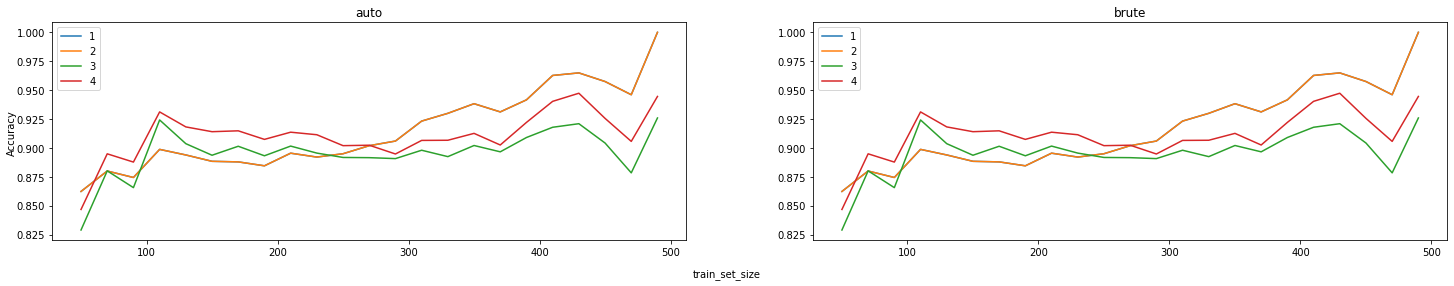

In [ ]:
# algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
# weights='distance, 'uniform'

from sklearn.metrics import accuracy_score
x,y=shuffle(X,Y)
algorithms=['auto','brute']
fig,ax=plt.subplots(1,len(algorithms),figsize=(25,4))

for i in range(len(algorithms)):
  algo=algorithms[i]
  print('algorithms >>> ',algo)
  for neigh in range(1,5,1):
    print("neighbors: ",neigh,'.................')
    accuracy=[]
    model=KNN(n_neighbors=neigh,weights='distance',algorithm=algo) # neighbors = 4
    
    for train_sample in range(50,500,20):
      model.fit(x[:train_sample],y[:train_sample])
      score_=f1_score(model.predict(x[train_sample:]),y[train_sample:],average='weighted')
      # accuracy.append(accuracy_score(model.predict(x[train_sample:]),y[train_sample:]))
      accuracy.append(score_)
      start_time=time.time()
      _=accuracy_score(model.predict([x_data[-1]]),[y_data[-1]])
      end_time=time.time()-start_time
      # print("train_size: ",train_sample," f1 score: VBA:", score_,"ambient accuracy: ",accuracy_score(model.predict(x_amb),y_amb), " execution time: ", int(end_time*1000), "ms")
      print("train_size: ",train_sample," f1 score: VBA:", score_," execution time: ", int(end_time*1000), "ms")
    ax[i].plot(range(50,500,20),accuracy)
    ax[i].title.set_text(algo)
    ax[i].legend(range(1,5,1),loc="upper left")
fig.text(0.5, 0.00, 'train_set_size', ha='center',)
fig.text(0.1, 0.5, 'Accuracy', va='center', rotation='vertical')
plt.show()
  # with normalization 88-98
  # without normalization max upto 82-94

neighbors:  1 .................
train_size:  50  f1 score: VBA: 0.7810752653893972 ambient accuracy:  0.734375  execution time:  1 ms
train_size:  70  f1 score: VBA: 0.828751636508618 ambient accuracy:  0.75  execution time:  2 ms
train_size:  90  f1 score: VBA: 0.8410636741648274 ambient accuracy:  0.75  execution time:  2 ms
train_size:  110  f1 score: VBA: 0.8521953084622508 ambient accuracy:  0.75  execution time:  2 ms
train_size:  130  f1 score: VBA: 0.8669916358600234 ambient accuracy:  0.75  execution time:  2 ms
train_size:  150  f1 score: VBA: 0.8756111582083201 ambient accuracy:  0.75  execution time:  3 ms
train_size:  170  f1 score: VBA: 0.8796575429502769 ambient accuracy:  0.75  execution time:  3 ms
train_size:  190  f1 score: VBA: 0.884325151680979 ambient accuracy:  0.65625  execution time:  3 ms
train_size:  210  f1 score: VBA: 0.880408015138554 ambient accuracy:  0.65625  execution time:  3 ms
train_size:  230  f1 score: VBA: 0.8948028239834349 ambient accuracy:  0.

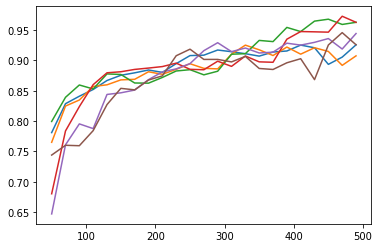

In [ ]:
 # trainig with normalization


from sklearn.metrics import accuracy_score
for neigh in range(1,7,1):
  print("neighbors: ",neigh,'.................')
  accuracy=[]
  model=KNN(n_neighbors=neigh,weights='distance') 
  x=normal(X)
  x_amb=normal(X_amb)
  x_amb,y_amb=shuffle(x_amb,y_amb)
  x,y=shuffle(x,Y)
  for train_sample in range(50,500,20):
    model.fit(x[:train_sample],y[:train_sample])
    score_=f1_score(model.predict(x[train_sample:]),y[train_sample:],average='weighted')
    # accuracy.append(accuracy_score(model.predict(x[train_sample:]),y[train_sample:]))
    accuracy.append(score_)
    start_time=time.time()
    _=accuracy_score(model.predict([x_data[-1]]),[y_data[-1]])
    end_time=time.time()-start_time
    print("train_size: ",train_sample," f1 score: VBA:", score_,"ambient accuracy: ",accuracy_score(model.predict(x_amb),y_amb), " execution time: ", int(end_time*1000), "ms")
  plt.plot(range(50,500,20),accuracy)
  # with normalization 88-98
  # without normalization max upto 82-94

neighbors:  1 .................
train_size:  50  f1 score: VBA: 0.7585546463889863 ambient accuracy:  0.65625  execution time:  1 ms
train_size:  250  f1 score: VBA: 0.9252740755308794 ambient accuracy:  0.75  execution time:  5 ms
train_size:  450  f1 score: VBA: 0.9148936170212766 ambient accuracy:  0.75  execution time:  7 ms
neighbors:  2 .................
train_size:  50  f1 score: VBA: 0.8185203698421131 ambient accuracy:  0.625  execution time:  1 ms
train_size:  250  f1 score: VBA: 0.9183673469387755 ambient accuracy:  0.6875  execution time:  5 ms
train_size:  450  f1 score: VBA: 0.9255572240876035 ambient accuracy:  0.71875  execution time:  7 ms
neighbors:  3 .................
train_size:  50  f1 score: VBA: 0.7872255766992609 ambient accuracy:  0.671875  execution time:  1 ms
train_size:  250  f1 score: VBA: 0.8707482993197279 ambient accuracy:  0.734375  execution time:  5 ms
train_size:  450  f1 score: VBA: 0.9157210401891254 ambient accuracy:  0.75  execution time:  6 ms

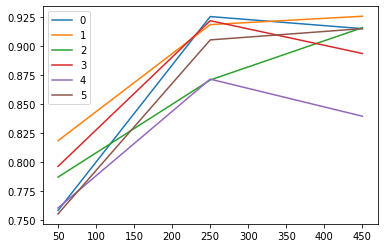

In [ ]:
# trainig with normalization


from sklearn.metrics import accuracy_score
for neigh in range(1,7,1):
  print("neighbors: ",neigh,'.................')
  accuracy=[]
  model=KNN(n_neighbors=neigh,weights='distance') 
  x=normal(X)
  x_amb=normal(X_amb)
  x_amb,y_amb=shuffle(x_amb,y_amb)
  x,y=shuffle(x,Y)
  for train_sample in range(50,500,200):
    model.fit(x[:train_sample],y[:train_sample])
    score_=f1_score(model.predict(x[train_sample:]),y[train_sample:],average='weighted')
    # accuracy.append(accuracy_score(model.predict(x[train_sample:]),y[train_sample:]))
    accuracy.append(score_)
    start_time=time.time()
    _=accuracy_score(model.predict([x_data[-1]]),[y_data[-1]])
    end_time=time.time()-start_time
    print("train_size: ",train_sample," f1 score: VBA:", score_,"ambient accuracy: ",accuracy_score(model.predict(x_amb),y_amb), " execution time: ", int(end_time*1000), "ms")
  plt.plot(range(50,500,200),accuracy)
plt.legend(range(7))
  # with normalization 88-98
  # without normalization max upto 82-94

<h1> k means clustering</h1>

In [ ]:
from sklearn.cluster import KMeans

epoch:  0 .................
train_size:  50  f1 score: VBA: 0.49404915057373144 ambient accuracy:  0.0  execution time:  1 ms
train_size:  70  f1 score: VBA: 0.6031702725977183 ambient accuracy:  0.0  execution time:  1 ms
train_size:  90  f1 score: VBA: 0.5323366633052603 ambient accuracy:  0.0  execution time:  1 ms
train_size:  110  f1 score: VBA: 0.5216198338742696 ambient accuracy:  0.0  execution time:  1 ms
train_size:  130  f1 score: VBA: 0.543283150366071 ambient accuracy:  0.0  execution time:  1 ms
train_size:  150  f1 score: VBA: 0.49993540434190475 ambient accuracy:  0.953125  execution time:  1 ms
train_size:  170  f1 score: VBA: 0.4884613047985861 ambient accuracy:  1.0  execution time:  1 ms
train_size:  190  f1 score: VBA: 0.49665210271292837 ambient accuracy:  1.0  execution time:  1 ms
train_size:  210  f1 score: VBA: 0.5248927375562787 ambient accuracy:  0.015625  execution time:  1 ms
train_size:  230  f1 score: VBA: 0.5246220409130797 ambient accuracy:  0.0  execu

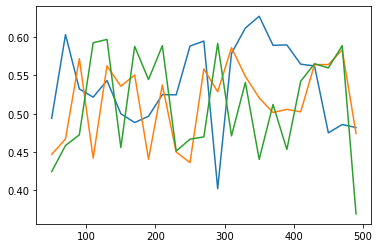

In [ ]:
from sklearn.metrics import accuracy_score
for epoch in range(3):
  print("epoch: ",epoch,'.................')
  accuracy=[]
  model=KMeans(n_clusters=2,random_state=0)
  x_amb,y_amb=shuffle(x_amb,y_amb)
  x,y=shuffle(X,Y)
  for train_sample in range(50,500,20):
    model.fit(x[:train_sample],y[:train_sample])
    score_=f1_score(model.predict(x[train_sample:]),y[train_sample:],average='weighted')
    # accuracy.append(accuracy_score(model.predict(x[train_sample:]),y[train_sample:]))
    accuracy.append(score_)
    start_time=time.time()
    _=accuracy_score(model.predict([x_data[-1]]),[y_data[-1]])
    end_time=time.time()-start_time
    print("train_size: ",train_sample," f1 score: VBA:", score_,"ambient accuracy: ",accuracy_score(model.predict(x_amb),y_amb), " execution time: ", int(end_time*1000), "ms")
  plt.plot(range(50,500,20),accuracy)
  # with normalization 88-98
  # without normalization max upto 82-94

epoch:  0 .................
train_size:  50  f1 score: VBA: 0.5054241334205146 ambient accuracy:  0.375  execution time:  1 ms
train_size:  70  f1 score: VBA: 0.5611814345991561 ambient accuracy:  0.5  execution time:  1 ms
train_size:  90  f1 score: VBA: 0.45278890725471405 ambient accuracy:  0.453125  execution time:  1 ms
train_size:  110  f1 score: VBA: 0.5706634767481048 ambient accuracy:  0.390625  execution time:  1 ms
train_size:  130  f1 score: VBA: 0.5764411956537996 ambient accuracy:  0.53125  execution time:  1 ms
train_size:  150  f1 score: VBA: 0.5649889004993177 ambient accuracy:  0.453125  execution time:  1 ms
train_size:  170  f1 score: VBA: 0.4872183107477225 ambient accuracy:  0.3125  execution time:  1 ms
train_size:  190  f1 score: VBA: 0.5532709038912876 ambient accuracy:  0.625  execution time:  1 ms
train_size:  210  f1 score: VBA: 0.5364088219572635 ambient accuracy:  0.640625  execution time:  1 ms
train_size:  230  f1 score: VBA: 0.5387580790177311 ambient a

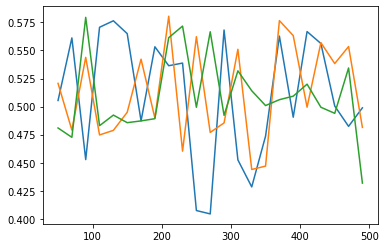

In [ ]:
# with normalization.


from sklearn.metrics import accuracy_score
for epoch in range(3):
  print("epoch: ",epoch,'.................')
  accuracy=[]
  model=KMeans(n_clusters=2,random_state=0)
  x=normal(X)
  x_amb=normal(X_amb)
  x_amb,y_amb=shuffle(x_amb,y_amb)
  x,y=shuffle(x,Y)
  for train_sample in range(50,500,20):
    model.fit(x[:train_sample],y[:train_sample])
    score_=f1_score(model.predict(x[train_sample:]),y[train_sample:],average='weighted')
    # accuracy.append(accuracy_score(model.predict(x[train_sample:]),y[train_sample:]))
    accuracy.append(score_)
    start_time=time.time()
    _=accuracy_score(model.predict([x_data[-1]]),[y_data[-1]])
    end_time=time.time()-start_time
    print("train_size: ",train_sample," f1 score: VBA:", score_,"ambient accuracy: ",accuracy_score(model.predict(x_amb),y_amb), " execution time: ", int(end_time*1000), "ms")
  plt.plot(range(50,500,20),accuracy)
  # with normalization 88-98
  # without normalization max upto 82-94

<h1>hirarchical clustering</h1>

In [ ]:
from sklearn.cluster import AgglomerativeClustering

epoch:  0 ............
train_size:  50  f1 score: VBA: 0.5855640305098354 ambient accuracy:  0.125  execution time:  1 ms
train_size:  70  f1 score: VBA: 0.57285743930276 ambient accuracy:  0.125  execution time:  0 ms
train_size:  90  f1 score: VBA: 0.4656110836219693 ambient accuracy:  0.125  execution time:  0 ms
train_size:  110  f1 score: VBA: 0.5933884297520661 ambient accuracy:  0.125  execution time:  0 ms
train_size:  130  f1 score: VBA: 0.5999131303479129 ambient accuracy:  0.125  execution time:  0 ms
train_size:  150  f1 score: VBA: 0.6125295055821371 ambient accuracy:  0.125  execution time:  0 ms
train_size:  170  f1 score: VBA: 0.6081306116768544 ambient accuracy:  0.125  execution time:  0 ms
train_size:  190  f1 score: VBA: 0.5976891862301589 ambient accuracy:  0.125  execution time:  0 ms
train_size:  210  f1 score: VBA: 0.6048272357723578 ambient accuracy:  0.125  execution time:  0 ms
train_size:  230  f1 score: VBA: 0.40399651499395745 ambient accuracy:  0.125  exe

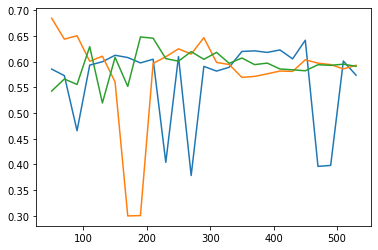

In [ ]:
from sklearn.metrics import accuracy_score
for epoch in range(3):
  print("epoch: ",epoch,'............')
  accuracy=[]
  model=AgglomerativeClustering(n_clusters=2,affinity='euclidean')
  x_amb,y_amb=shuffle(X_amb,y_amb)
  x,y=shuffle(X,Y)
  for train_size in range(50,544,20):
    score_=f1_score(model.fit_predict(x[:train_size]),y[:train_size],average='weighted')
    accuracy.append(score_)
    start_time=time.time()
    _=accuracy_score(model.fit_predict(x_data[-2:]),y_data[-2:])
    end_time=time.time()-start_time
    print("train_size: ",train_size," f1 score: VBA:", score_,"ambient accuracy: ",accuracy_score(model.fit_predict(x_amb),y_amb), " execution time: ", int(end_time*1000), "ms")
  plt.plot(range(50,544,20),accuracy)

epoch:  0 ............
train_size:  50  f1 score: VBA: 0.5878131459280694 ambient accuracy:  0.125  execution time:  0 ms
train_size:  70  f1 score: VBA: 0.6748047194169363 ambient accuracy:  0.125  execution time:  0 ms
train_size:  90  f1 score: VBA: 0.6771034566551242 ambient accuracy:  0.125  execution time:  0 ms
train_size:  110  f1 score: VBA: 0.5272727272727272 ambient accuracy:  0.125  execution time:  0 ms
train_size:  130  f1 score: VBA: 0.6348472580051527 ambient accuracy:  0.125  execution time:  0 ms
train_size:  150  f1 score: VBA: 0.6458901098901099 ambient accuracy:  0.125  execution time:  0 ms
train_size:  170  f1 score: VBA: 0.5919334029214022 ambient accuracy:  0.125  execution time:  0 ms
train_size:  190  f1 score: VBA: 0.5856434464456666 ambient accuracy:  0.125  execution time:  0 ms
train_size:  210  f1 score: VBA: 0.5996282182358955 ambient accuracy:  0.125  execution time:  0 ms
train_size:  230  f1 score: VBA: 0.6060568947280521 ambient accuracy:  0.125  ex

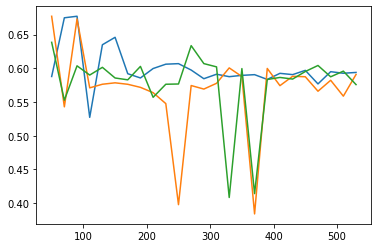

In [ ]:
from sklearn.metrics import accuracy_score
for epoch in range(3):
  print("epoch: ",epoch,'............')
  accuracy=[]
  model=AgglomerativeClustering(n_clusters=2,affinity='euclidean')
  x=normal(X)
  x_amb=normal(X_amb)
  x_amb,y_amb=shuffle(x_amb,y_amb)
  x,y=shuffle(x,Y)
  for train_size in range(50,544,20):
    score_=f1_score(model.fit_predict(x[:train_size]),y[:train_size],average='weighted')
    accuracy.append(score_)
    start_time=time.time()
    _=accuracy_score(model.fit_predict(x_data[-2:]),y_data[-2:])
    end_time=time.time()-start_time
    print("train_size: ",train_size," f1 score: VBA:", score_,"ambient accuracy: ",accuracy_score(model.fit_predict(x_amb),y_amb), " execution time: ", int(end_time*1000), "ms")
  plt.plot(range(50,544,20),accuracy)

<h1>affinity propagation</h1>

In [ ]:
print(__doc__)

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs


Automatically created module for IPython interactive environment


In [ ]:
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca=PCA(n_components=1)

In [ ]:
model=pca.fit_transform(x_data,y_data)

In [ ]:
pca.explained_variance_
# the actual eigenvalues (variance)

pca.explained_variance_ratio_ # the percentage of the variance


array([0.25435525])

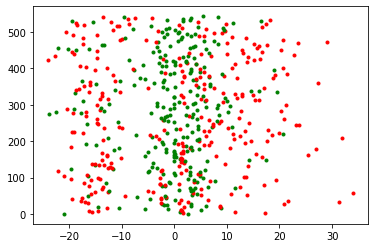

In [ ]:
for i in range(x_data.shape[0]):
  if y_data[i]==0:
    plt.plot(model[i],i,'g.')
  else:
    plt.plot(model[i],i,'r.')

In [ ]:
af=AffinityPropagation(preference=-50).fit(x_data)

In [ ]:
len(af.cluster_centers_)

543

In [ ]:
# pca=PCA(n_components=2)
# for i in [3,4,5,10,20,30]:
#   knn_comparison(pca.fit_transform(x),y,3)

In [ ]:
# class LSTMPredictor(torch.nn.Module):
#     def __init__(self,n_hidden=20):
#         super(LSTMPredictor,self).__init__()
#         self.n_hidden=n_hidden
        
#         # lstm1, lstm2,linear, LSTMCell is more flexible than lstm
#         # self.lstm1=torch.nn.LSTMCell(1,self.n_hidden)  # because we go one by one on each value
#         # self.lstm2=torch.nn.LSTMCell(self.n_hidden,self.n_hidden)
#         self.linear=torch.nn.Linear(self.n_hidden,1)
#     def forward(self,x,future=0): # future means how many prediction we want to do here.
#         outputs=[]
#         n_samples=x.size(0)
#         # h_t=torch.zeros(n_samples,self.n_hidden,dtype=torch.float32) # samples=N
#         # c_t=torch.zeros(n_samples,self.n_hidden,dtype=torch.float32)
        
#         # h_t2=torch.zeros(n_samples,self.n_hidden,dtype=torch.float32)
#         # c_t2=torch.zeros(n_samples,self.n_hidden,dtype=torch.float32)
#         softmax=torch.nn.Softmax(dim=1)
#         # for input_t in x.split(1,dim=1): # splits tensor in size 1 with dimension 1
#         #     print(input_t.shape)
#         #     # h_t,c_t=self.lstm1(input_t,(h_t,c_t))
#         #     # h_t2,c_t2=self.lstm2(h_t,(h_t2,c_t2))
#         #     output=softmax(self.linear(input_t))
#         #     outputs.append(output)
            
#         return softmax(self.linear(x))
#         outputs=torch.cat(outputs,dim=1)
#         return outputs

In [ ]:
# def accuracy(a,b):
#   true=0
#   for i in range(a.shape[1]):
#     if a[i][0]<.5 and b[i][0]==0:
#       true+=1
#     elif a[i][0]>=.5 and b[i][0]==1:
#       true+=1
#   print("accuracy: ",(true/a.shape[1])*100)

In [ ]:
# # size of y=100,1000

# train_input=torch.from_numpy(x[:500].astype(np.float32))  # 544,8868
# train_target=torch.from_numpy(y[:500].astype(np.float32))  # 544,1
# test_input=torch.from_numpy(x[500:].astype(np.float32))
# test_target=torch.from_numpy(y[500:].astype(np.float32))
# model=LSTMPredictor(x.shape[1])

# criterion=torch.nn.MSELoss()
# optimizer=torch.optim.LBFGS(model.parameters(),lr=0.08)


# n_steps=2
# for i in range(x.shape[0]):
#     print("step: ",i,end=' ')
#     self.linear=torch.nn.Linear(self.n_hidden,1)
#     out=model(train_input)
#     loss=criterion(out,train_target)
#     print("loss: ",loss.item(),end=' ')
#     accuracy(out.detach().numpy(),y[500:])
#     loss.backward()
#     optimizer.step(clouser)
    
# out=model(test_input)
# accuracy(out.detach().numpy(),y[500:])
        
    

<h1> sensor based prediction</h1>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from mlxtend.plotting import plot_decision_regions


In [ ]:
x_train_as=[]
y_train_as=[]
for i in case[:4]:
    keys=dataObj.data[i].keys()
    
    for j in keys:
        data=[]
        for k in classes[1:-3]:
            # x_train.append(normal(dataObj.data[i][j].data[k]))
            data.append(dataObj.data[i][j].data[k])
        x_train_as.append(data)
        y_train_as.append(1)
            
for i in case[4:]:
    keys=dataObj.data[i].keys()
    for j in keys:
        data=[]
        for k in classes[1:-3]:
            # x_train.append(normal(dataObj.data[i][j].data[k]))
            data.append(dataObj.data[i][j].data[k])
        x_train_as.append(data)
        y_train_as.append(0)

X=np.array(x_train_as)
Y=np.array(y_train_as)
print(X.shape)
print(Y.shape)

(68, 8, 8868)
(68,)


In [ ]:
def shuffle(a,b):
  n=len(a)
  print(n)
  index=list(range(n))
  np.random.shuffle(index)
  return a[index],b[index]

In [ ]:
# algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
# weights='distance, 'uniform'

from sklearn.metrics import accuracy_score
x_data,y_data=shuffle(X,Y)
x_all=np.concatenate(([x_data[:,i,:] for i in range(8)]),axis=0)
y_all=np.concatenate(([y_data for i in range(8)]),axis=0)
print(x_data.shape,y_data.shape)
print(x_all.shape,y_all.shape)
algorithms=['auto']
for s_number in range(1):
  x=np.concatenate((x_data[:,1,:],x_data[:,2,:],x_data[:,6,:],x_data[:,7,:]),axis=0)
  y=np.concatenate((y_data,y_data,y_data,y_data),axis=0)
  x,y=shuffle(x,y)
  print(x.shape,y.shape)
  print()
  print("************************   s_number : %d  **********************"%s_number)
  print()
  for i in range(len(algorithms)):
    algo=algorithms[i]
    print('algorithms >>> ',algo)
    for neigh in range(1,10,1):
      print("neighbors: ",neigh,'.................')
      accuracy=[]
      model=KNN(n_neighbors=neigh,weights='distance',algorithm=algo) # neighbors = 4
      
      for train_sample in range(40,len(x),20):
        model.fit(x[:train_sample],y[:train_sample])
        score_=f1_score(model.predict(x[train_sample:]),y[train_sample:],average='weighted')
        accuracy.append(score_)
        start_time=time.time()
        _=accuracy_score(model.predict([x[-1]]),[y[-1]])
        end_time=time.time()-start_time
        print("train_size: ",train_sample," f1 score: VBA:", score_,"train accuracy: ",accuracy_score(model.predict(x[:train_sample]),y[:train_sample])," acc all sensor: ",accuracy_score(model.predict(x_all),y_all), " execution time: ", int(end_time*1000), "ms")
        # print("train_size: ",train_sample," f1 score: VBA:", score_," execution time: ", int(end_time*1000), "ms")


        '''
        s0-> n1,n2 (b-50)
        s1-> n[1-4] (b-55)
        s2-> n1,n2 (b-40,50)
        s3 -> n3,n4 (b-50) 
        s4-> n[1-4] (b-50) 
        s5-> n[1-4] (b-55)
        s6-> n1,n2, (b-50)
        s7-> n3 (b-50)
        '''

68
(68, 8, 8868) (68,)
(544, 8868) (544,)
272
(272, 8868) (272,)

************************   s_number : 0  **********************

algorithms >>>  auto
neighbors:  1 .................
train_size:  40  f1 score: VBA: 0.7856862276924975 train accuracy:  1.0  acc all sensor:  0.8125  execution time:  1 ms
train_size:  60  f1 score: VBA: 0.8113207547169814 train accuracy:  1.0  acc all sensor:  0.8382352941176471  execution time:  1 ms
train_size:  80  f1 score: VBA: 0.8549275362318841 train accuracy:  1.0  acc all sensor:  0.875  execution time:  2 ms
train_size:  100  f1 score: VBA: 0.8723698781838316 train accuracy:  1.0  acc all sensor:  0.8933823529411765  execution time:  2 ms
train_size:  120  f1 score: VBA: 0.8946457051720209 train accuracy:  1.0  acc all sensor:  0.9172794117647058  execution time:  2 ms
train_size:  140  f1 score: VBA: 0.8939393939393939 train accuracy:  1.0  acc all sensor:  0.9319852941176471  execution time:  3 ms
train_size:  160  f1 score: VBA: 0.91950823408

In [ ]:
# algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
# weights='distance, 'uniform'

from sklearn.metrics import accuracy_score
x_data,y_data=shuffle(X,Y)
x_all=np.concatenate(([x_data[:,i,:] for i in range(8)]),axis=0)
y_all=np.concatenate(([y_data for i in range(8)]),axis=0)
print(x_data.shape,y_data.shape)
print(x_all.shape,y_all.shape)
algorithms=['auto']
for s_number in range(1):
  x=np.concatenate((x_data[:,1,:],x_data[:,2,:],x_data[:,6,:],x_data[:,7,:]),axis=0)
  y=np.concatenate((y_data,y_data,y_data,y_data),axis=0)
  x,y=shuffle(x,y)
  print(x.shape,y.shape)
  print()
  print("************************   s_number : %d  **********************"%s_number)
  print()
  for i in range(len(algorithms)):
    algo=algorithms[i]
    print('algorithms >>> ',algo)
    for neigh in range(1,10,1):
      print("neighbors: ",neigh,'.................')
      accuracy=[]
      model=KNN(n_neighbors=neigh,weights='distance',algorithm=algo) # neighbors = 4
      
      for train_sample in range(40,len(x),20):
        model.fit(x[:train_sample],y[:train_sample])
        score_=f1_score(model.predict(x[train_sample:]),y[train_sample:],average='weighted')
        accuracy.append(score_)
        start_time=time.time()
        _=accuracy_score(model.predict([x[-1]]),[y[-1]])
        end_time=time.time()-start_time
        print("train_size: ",train_sample," f1 score: VBA:", score_,"train accuracy: ",accuracy_score(model.predict(x[:train_sample]),y[:train_sample])," acc all sensor: ",accuracy_score(model.predict(x_all),y_all), " execution time: ", int(end_time*1000), "ms")
        # print("train_size: ",train_sample," f1 score: VBA:", score_," execution time: ", int(end_time*1000), "ms")


        '''
        s0-> n1,n2 (b-50)
        s1-> n[1-4] (b-55)
        s2-> n1,n2 (b-40,50)
        s3 -> n3,n4 (b-50) 
        s4-> n[1-4] (b-50) 
        s5-> n[1-4] (b-55)
        s6-> n1,n2, (b-50)
        s7-> n3 (b-50)
        '''

68
(68, 8, 8868) (68,)
(544, 8868) (544,)
272
(272, 8868) (272,)

************************   s_number : 0  **********************

algorithms >>>  auto
neighbors:  1 .................
train_size:  40  f1 score: VBA: 0.8320757765441391 train accuracy:  1.0  acc all sensor:  0.8584558823529411  execution time:  1 ms
train_size:  60  f1 score: VBA: 0.8780192745608327 train accuracy:  1.0  acc all sensor:  0.8933823529411765  execution time:  1 ms
train_size:  80  f1 score: VBA: 0.8801920745224717 train accuracy:  1.0  acc all sensor:  0.8988970588235294  execution time:  2 ms
train_size:  100  f1 score: VBA: 0.8836894694452836 train accuracy:  1.0  acc all sensor:  0.90625  execution time:  2 ms
train_size:  120  f1 score: VBA: 0.9078468235788012 train accuracy:  1.0  acc all sensor:  0.9264705882352942  execution time:  2 ms
train_size:  140  f1 score: VBA: 0.9090700344431688 train accuracy:  1.0  acc all sensor:  0.9338235294117647  execution time:  3 ms
train_size:  160  f1 score: VBA:

KeyboardInterrupt: ignored

In [ ]:
# algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
# weights='distance, 'uniform'

from sklearn.metrics import accuracy_score
x_data,y_data=shuffle(X,Y)
x_all=np.concatenate(([x_data[:,i,:] for i in range(8)]),axis=0)
y_all=np.concatenate(([y_data for i in range(8)]),axis=0)
print(x_data.shape,y_data.shape)
print(x_all.shape,y_all.shape)
algorithms=['auto']
for s_number in range(1):
  x=np.concatenate((x_data[:,1,:],x_data[:,2,:],x_data[:,6,:],x_data[:,7,:]),axis=0)
  y=np.concatenate((y_data,y_data,y_data,y_data),axis=0)
  x,y=shuffle(x,y)
  print(x.shape,y.shape)
  print()
  print("************************   s_number : %d  **********************"%s_number)
  print()
  for i in range(len(algorithms)):
    algo=algorithms[i]
    print('algorithms >>> ',algo)
    for neigh in range(1,5,1):
      print("neighbors: ",neigh,'.................')
      accuracy=[]
      model=KNN(n_neighbors=neigh,weights='distance',algorithm=algo) # neighbors = 4
      
      for train_sample in range(40,len(x),20):
        model.fit(x[:train_sample],y[:train_sample])
        score_=f1_score(model.predict(x[train_sample:]),y[train_sample:],average='weighted')
        accuracy.append(score_)
        start_time=time.time()
        _=accuracy_score(model.predict([x[-1]]),[y[-1]])
        end_time=time.time()-start_time
        print("train_size: ",train_sample," f1 score: VBA:", score_,"train accuracy: ",accuracy_score(model.predict(x[:train_sample]),y[:train_sample])," acc all sensor: ",accuracy_score(model.predict(x_all),y_all), " execution time: ", int(end_time*1000), "ms")
        # print("train_size: ",train_sample," f1 score: VBA:", score_," execution time: ", int(end_time*1000), "ms")


        '''
        s0-> n1,n2 (b-50)
        s1-> n[1-4] (b-55)
        s2-> n1,n2 (b-40,50)
        s3 -> n3,n4 (b-50) 
        s4-> n[1-4] (b-50) 
        s5-> n[1-4] (b-55)
        s6-> n1,n2, (b-50)
        s7-> n3 (b-50)
        '''

68
(68, 8, 8868) (68,)
(544, 8868) (544,)
272
(272, 8868) (272,)

************************   s_number : 0  **********************

algorithms >>>  auto
neighbors:  1 .................
train_size:  40  f1 score: VBA: 0.8014880952380952 train accuracy:  1.0  acc all sensor:  0.8400735294117647  execution time:  1 ms
train_size:  60  f1 score: VBA: 0.8300072568940493 train accuracy:  1.0  acc all sensor:  0.8694852941176471  execution time:  1 ms
train_size:  80  f1 score: VBA: 0.86950493434467 train accuracy:  1.0  acc all sensor:  0.8933823529411765  execution time:  2 ms
train_size:  100  f1 score: VBA: 0.8835318585743998 train accuracy:  1.0  acc all sensor:  0.9191176470588235  execution time:  2 ms
train_size:  120  f1 score: VBA: 0.9209294260447373 train accuracy:  1.0  acc all sensor:  0.9393382352941176  execution time:  2 ms
train_size:  140  f1 score: VBA: 0.916499032511447 train accuracy:  1.0  acc all sensor:  0.9411764705882353  execution time:  2 ms
train_size:  160  f1 sco

In [ ]:
# algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
# weights='distance, 'uniform'

from sklearn.metrics import accuracy_score
x_data,y_data=shuffle(X,Y)
x_all=np.concatenate(([x_data[:,i,:] for i in range(8)]),axis=0)
y_all=np.concatenate(([y_data for i in range(8)]),axis=0)
print(x_data.shape,y_data.shape)
print(x_all.shape,y_all.shape)
algorithms=['auto']
for s_number in range(1):
  x=np.concatenate((x_data[:,3,:],x_data[:,5,:],x_data[:,6,:],x_data[:,4,:]),axis=0)
  y=np.concatenate((y_data,y_data,y_data,y_data),axis=0)
  x,y=shuffle(x,y)
  print(x.shape,y.shape)
  print()
  print("************************   s_number : %d  **********************"%s_number)
  print()
  for i in range(len(algorithms)):
    algo=algorithms[i]
    print('algorithms >>> ',algo)
    for neigh in range(1,10,1):
      print("neighbors: ",neigh,'.................')
      accuracy=[]
      model=KNN(n_neighbors=neigh,weights='distance',algorithm=algo) # neighbors = 4
      
      for train_sample in range(40,len(x),20):
        model.fit(x[:train_sample],y[:train_sample])
        score_=f1_score(model.predict(x[train_sample:]),y[train_sample:],average='weighted')
        accuracy.append(score_)
        start_time=time.time()
        _=accuracy_score(model.predict([x[-1]]),[y[-1]])
        end_time=time.time()-start_time
        print("train_size: ",train_sample," f1 score: VBA:", score_,"train accuracy: ",accuracy_score(model.predict(x[:train_sample]),y[:train_sample])," acc all sensor: ",accuracy_score(model.predict(x_all),y_all), " execution time: ", int(end_time*1000), "ms")
        # print("train_size: ",train_sample," f1 score: VBA:", score_," execution time: ", int(end_time*1000), "ms")


        '''
        s0-> n1,n2 (b-50)
        s1-> n[1-4] (b-55)
        s2-> n1,n2 (b-40,50)
        s3 -> n3,n4 (b-50) 
        s4-> n[1-4] (b-50) 
        s5-> n[1-4] (b-55)
        s6-> n1,n2, (b-50)
        s7-> n3 (b-50)
        '''

68
(68, 8, 8868) (68,)
(544, 8868) (544,)
272
(272, 8868) (272,)

************************   s_number : 0  **********************

algorithms >>>  auto
neighbors:  1 .................
train_size:  40  f1 score: VBA: 0.827741627984085 train accuracy:  1.0  acc all sensor:  0.8547794117647058  execution time:  1 ms
train_size:  60  f1 score: VBA: 0.859028917145201 train accuracy:  1.0  acc all sensor:  0.8768382352941176  execution time:  1 ms
train_size:  80  f1 score: VBA: 0.843341503267974 train accuracy:  1.0  acc all sensor:  0.8823529411764706  execution time:  2 ms
train_size:  100  f1 score: VBA: 0.8424965060707268 train accuracy:  1.0  acc all sensor:  0.8915441176470589  execution time:  2 ms
train_size:  120  f1 score: VBA: 0.8156299840510366 train accuracy:  1.0  acc all sensor:  0.8988970588235294  execution time:  2 ms
train_size:  140  f1 score: VBA: 0.8101162205421072 train accuracy:  1.0  acc all sensor:  0.9099264705882353  execution time:  3 ms
train_size:  160  f1 sco

KeyboardInterrupt: ignored

In [ ]:
# algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
# weights='distance, 'uniform'

from sklearn.metrics import accuracy_score
x_data,y_data=shuffle(X,Y)
x_all=np.concatenate(([x_data[:,i,:] for i in range(8)]),axis=0)
y_all=np.concatenate(([y_data for i in range(8)]),axis=0)
print(x_data.shape,y_data.shape)
print(x_all.shape,y_all.shape)
algorithms=['auto']
for s_number in range(1):
  x=np.concatenate((x_data[:,6,:],x_data[:,2,:]),axis=0)
  y=np.concatenate((y_data,y_data),axis=0)
  x,y=shuffle(x,y)
  print(x.shape,y.shape)
  print()
  print("************************   s_number : %d  **********************"%s_number)
  print()
  for i in range(len(algorithms)):
    algo=algorithms[i]
    print('algorithms >>> ',algo)
    for neigh in range(1,5,1):
      print("neighbors: ",neigh,'.................')
      accuracy=[]
      model=KNN(n_neighbors=neigh,weights='distance',algorithm=algo) # neighbors = 4
      
      for train_sample in range(40,len(x),10):
        model.fit(x[:train_sample],y[:train_sample])
        score_=f1_score(model.predict(x[train_sample:]),y[train_sample:],average='weighted')
        accuracy.append(score_)
        start_time=time.time()
        _=accuracy_score(model.predict([x[-1]]),[y[-1]])
        end_time=time.time()-start_time
        print("train_size: ",train_sample," f1 score: VBA:", score_,"train accuracy: ",accuracy_score(model.predict(x[:train_sample]),y[:train_sample])," acc all sensor: ",accuracy_score(model.predict(x_all),y_all), " execution time: ", int(end_time*1000), "ms")
        # print("train_size: ",train_sample," f1 score: VBA:", score_," execution time: ", int(end_time*1000), "ms")


        '''
        s0-> n1,n2 (b-50)
        s1-> n[1-4] (b-55)
        s2-> n1,n2 (b-40,50)
        s3 -> n3,n4 (b-50) 
        s4-> n[1-4] (b-50) 
        s5-> n[1-4] (b-55)
        s6-> n1,n2, (b-50)
        s7-> n3 (b-50)
        '''

68
(68, 8, 8868) (68,)
(544, 8868) (544,)
136
(136, 8868) (136,)

************************   s_number : 0  **********************

algorithms >>>  auto
neighbors:  1 .................
train_size:  40  f1 score: VBA: 0.8280740378343117 train accuracy:  1.0  acc all sensor:  0.8161764705882353  execution time:  1 ms
train_size:  50  f1 score: VBA: 0.8520321669202348 train accuracy:  1.0  acc all sensor:  0.8400735294117647  execution time:  1 ms
train_size:  60  f1 score: VBA: 0.8284851472944655 train accuracy:  1.0  acc all sensor:  0.8400735294117647  execution time:  1 ms
train_size:  70  f1 score: VBA: 0.8484848484848485 train accuracy:  1.0  acc all sensor:  0.8639705882352942  execution time:  2 ms
train_size:  80  f1 score: VBA: 0.9130146734062914 train accuracy:  1.0  acc all sensor:  0.8823529411764706  execution time:  2 ms
train_size:  90  f1 score: VBA: 0.9570508863215451 train accuracy:  1.0  acc all sensor:  0.8952205882352942  execution time:  2 ms
train_size:  100  f1 sco

KeyboardInterrupt: ignored